In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
data = pd.read_csv('dataset_final.csv')
data.head(4)

,IP_add,URL_length,Shortening_serv,having_at_symbol,double_slash,prefix_suffix,sub_domain,ssl_final state,domain_reg_len,Favicon,...,popup window,iframe,age of domain,dns record,we trffc,page rank,google index,links pointing to page,statistical report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
IP_add                    11055 non-null int64
URL_length                11055 non-null int64
Shortening_serv           11055 non-null int64
having_at_symbol          11055 non-null int64
double_slash              11055 non-null int64
prefix_suffix             11055 non-null int64
sub_domain                11055 non-null int64
ssl_final state           11055 non-null int64
domain_reg_len            11055 non-null int64
Favicon                   11055 non-null int64
port                      11055 non-null int64
https token               11055 non-null int64
rqst_url                  11055 non-null int64
url_of_anchor             11055 non-null int64
links in tags             11055 non-null int64
sfh                       11055 non-null int64
sbmttng to mail           11055 non-null int64
abnrml url                11055 non-null int64
redrct                    11055 non-null int6

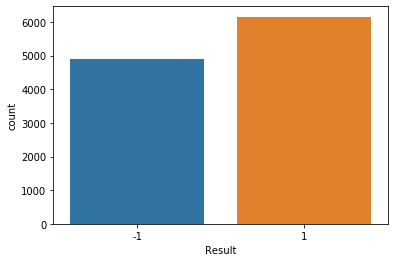

In [4]:
sns.countplot(x='Result',data=data)

In [5]:
X = data.drop('Result',axis=1).values
y = data['Result'].values

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40,random_state=10)

In [7]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 6633 samples.
Testing set has 4422 samples.


In [30]:
#Classifier=LogisticRegression(solver='newton-cg')
#Classifier = tree.DecisionTreeClassifier(max_depth=3)
#Classifier = svm.SVC(gamma='auto', kernel='linear',degree =2)
Classifier = svm.SVC(gamma='auto', kernel='rbf',degree =2)
Classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
predictions = Classifier.predict(X_test)

In [34]:
print("Accuracy is: ",100*(accuracy_score(y_test,predictions)))

Accuracy is:  94.18815015829941


In [35]:
print("f1 score is ",f1_score(y_test,predictions,average='weighted'))

f1 score is  0.9417545955194627
